In [1]:
import json
import matplotlib.pyplot as plt
import seaborn
from collections import Counter
import collections
%matplotlib inline

In [7]:
# majority matrix absolute, new dataset
annotations_new = []
majority_matrix = {'0.6':[0,0,0,0],'0.0':[0,0,0,0],'1.0':[0,0,0,0],'0.3':[0,0,0,0]}

with open("truth_verification.jsonl", "r") as inf:
    annotations_new = [json.loads(x) for x in inf.readlines()]

for a in annotations_new:
    judge = a['truthJudgments']
    mode = a['truthMode']
    counter = Counter(judge)
    most_common = counter.most_common()
    if (most_common[0][0] == mode):
        majority_matrix[str(most_common[0][0])[:3]][(most_common[0][1])-2] += 1
    else:
        majority_matrix[str(most_common[1][0])[:3]][(most_common[1][1])-2] += 1

print("     |   2\t  3\t  4\t  5")
print("--------------------------------------------")
print("0.0  | " + str(majority_matrix['0.0'][0]) + "\t" + str(majority_matrix['0.0'][1])+ "\t" + str(majority_matrix['0.0'][2])+ "\t" + str(majority_matrix['0.0'][3]))
print("0.3  | " + str(majority_matrix['0.3'][0]) + "\t" + str(majority_matrix['0.3'][1])+ "\t" + str(majority_matrix['0.3'][2])+ "\t" + str(majority_matrix['0.3'][3]))
print("0.6  | " + str(majority_matrix['0.6'][0]) + "\t" + str(majority_matrix['0.6'][1])+ "\t" + str(majority_matrix['0.6'][2])+ "\t" + str(majority_matrix['0.6'][3]))
print("1.0  | " + str(majority_matrix['1.0'][0]) + "\t" + str(majority_matrix['1.0'][1])+ "\t" + str(majority_matrix['1.0'][2])+ "\t" + str(majority_matrix['1.0'][3]))


     |   2	  3	  4	  5
--------------------------------------------
0.0  | 1196	1438	679	306
0.3  | 2838	2882	800	119
0.6  | 3029	3055	1044	146
1.0  | 1247	977	204	20


In [6]:
# majority matrix absolute, old dataset
annotations_old = []
majority_matrix = {'0.6':[0,0,0,0],'0.0':[0,0,0,0],'1.0':[0,0,0,0],'0.3':[0,0,0,0]}

with open("clickbait17-train-170331/truth.jsonl", "r") as inf:
    annotations_old = [json.loads(x) for x in inf.readlines()]

for a in annotations_old:
    judge = a['truthJudgments']
    mode = a['truthMode']
    counter = Counter(judge)
    most_common = counter.most_common()
    if (most_common[0][0] == mode):
        majority_matrix[str(most_common[0][0])[:3]][max(most_common[0][1], 5)-2] += 1
    else:
        majority_matrix[str(most_common[1][0])[:3]][max(most_common[1][1], 5)-2] += 1

print("     |   2\t  3\t  4\t  5+")
print("--------------------------------------------")
print("0.0  | " + str(majority_matrix['0.0'][0]) + "\t" + str(majority_matrix['0.0'][1])+ "\t" + str(majority_matrix['0.0'][2])+ "\t" + str(majority_matrix['0.0'][3]))
print("0.3  | " + str(majority_matrix['0.3'][0]) + "\t" + str(majority_matrix['0.3'][1])+ "\t" + str(majority_matrix['0.3'][2])+ "\t" + str(majority_matrix['0.3'][3]))
print("0.6  | " + str(majority_matrix['0.6'][0]) + "\t" + str(majority_matrix['0.6'][1])+ "\t" + str(majority_matrix['0.6'][2])+ "\t" + str(majority_matrix['0.6'][3]))
print("1.0  | " + str(majority_matrix['1.0'][0]) + "\t" + str(majority_matrix['1.0'][1])+ "\t" + str(majority_matrix['1.0'][2])+ "\t" + str(majority_matrix['1.0'][3]))


     |   2	  3	  4	  5+
--------------------------------------------
0.0  | 0	0	0	1259
0.3  | 0	0	0	438
0.6  | 0	0	0	417
1.0  | 0	0	0	345


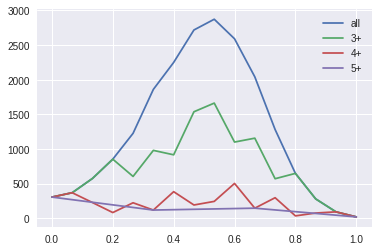

In [8]:
# plot mean new dataset
y_major_all = {}
y_major_3 = {}
y_major_4 = {}
y_major_5 = {}

for a in annotations_new:
    mean = str(round(a['truthMean'], 5))[:6]
    most_common = Counter(a['truthJudgments']).most_common(1)
    try:
        y_major_all[mean] += 1
    except:
        y_major_all[mean] = 1
    if most_common[0][1] > 2:
        try:
            y_major_3[mean] += 1
        except:
            y_major_3[mean] = 1
    if most_common[0][1] > 3:
        try:
            y_major_4[mean] += 1
        except:
            y_major_4[mean] = 1
    if most_common[0][1] > 4:
        try:
            y_major_5[mean] += 1
        except:
            y_major_5[mean] = 1

ordered_all = collections.OrderedDict(sorted(y_major_all.items()))
plt.plot(list(ordered_all.keys()), list(ordered_all.values()), label="all")

ordered_3 = collections.OrderedDict(sorted(y_major_3.items()))
plt.plot(list(ordered_3.keys()), list(ordered_3.values()), label="3+")

ordered_4 = collections.OrderedDict(sorted(y_major_4.items()))
plt.plot(list(ordered_4.keys()), list(ordered_4.values()), label="4+")

ordered_5 = collections.OrderedDict(sorted(y_major_5.items()))
plt.plot(list(ordered_5.keys()), list(ordered_5.values()), label="5")

plt.legend()

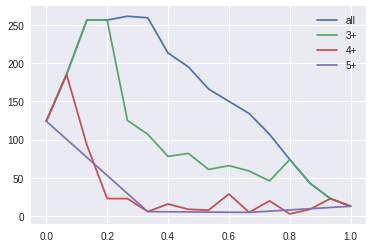

In [13]:
# plot mean old dataset
y_major_all = {}
y_major_3 = {}
y_major_4 = {}
y_major_5 = {}

for a in annotations_old:
    mean = str(round(a['truthMean'], 5))[:6]
    most_common = Counter(a['truthJudgments']).most_common(1)
    try:
        y_major_all[mean] += 1
    except:
        y_major_all[mean] = 1
    if most_common[0][1] > 2:
        try:
            y_major_3[mean] += 1
        except:
            y_major_3[mean] = 1
    if most_common[0][1] > 3:
        try:
            y_major_4[mean] += 1
        except:
            y_major_4[mean] = 1
    if most_common[0][1] > 4:
        try:
            y_major_5[mean] += 1
        except:
            y_major_5[mean] = 1

ordered_all = collections.OrderedDict(sorted(y_major_all.items()))
plt.plot(list(ordered_all.keys()), list(ordered_all.values()), label="all")

ordered_3 = collections.OrderedDict(sorted(y_major_3.items()))
plt.plot(list(ordered_3.keys()), list(ordered_3.values()), label="3+")

ordered_4 = collections.OrderedDict(sorted(y_major_4.items()))
plt.plot(list(ordered_4.keys()), list(ordered_4.values()), label="4+")

ordered_5 = collections.OrderedDict(sorted(y_major_5.items()))
plt.plot(list(ordered_5.keys()), list(ordered_5.values()), label="5+")

plt.legend()

56
OrderedDict([('[0.0, 0.0, 0.0, 0.0, 0.0]', 306), ('[0.3333333333, 0.0, 0.0, 0.0, 0.0]', 369), ('[0.3333333333, 0.3333333333, 0.0, 0.0, 0.0]', 348), ('[0.3333333333, 0.3333333333, 0.3333333333, 0.0, 0.0]', 287), ('[0.3333333333, 0.3333333333, 0.3333333333, 0.3333333333, 0.0]', 224), ('[0.3333333333, 0.3333333333, 0.3333333333, 0.3333333333, 0.3333333333]', 119), ('[0.6666666666, 0.0, 0.0, 0.0, 0.0]', 227), ('[0.6666666666, 0.3333333333, 0.0, 0.0, 0.0]', 483), ('[0.6666666666, 0.3333333333, 0.3333333333, 0.0, 0.0]', 622), ('[0.6666666666, 0.3333333333, 0.3333333333, 0.3333333333, 0.0]', 694), ('[0.6666666666, 0.3333333333, 0.3333333333, 0.3333333333, 0.3333333333]', 384), ('[0.6666666666, 0.6666666666, 0.0, 0.0, 0.0]', 189), ('[0.6666666666, 0.6666666666, 0.3333333333, 0.0, 0.0]', 562), ('[0.6666666666, 0.6666666666, 0.3333333333, 0.3333333333, 0.0]', 845), ('[0.6666666666, 0.6666666666, 0.3333333333, 0.3333333333, 0.3333333333]', 698), ('[0.6666666666, 0.6666666666, 0.6666666666, 0.0

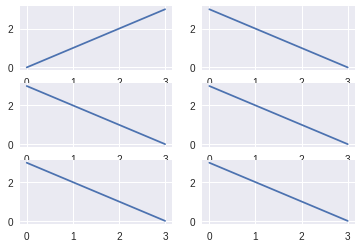

In [57]:
# majority classes new dataset
anno_new_perm = {}

# want: each permutation of judgments: put nr. occurance in matrix, maybe heatmap

for a in annotations_new:
    try:
        anno_new_perm[str(sorted(a['truthJudgments'], reverse=True))] += 1
    except KeyError:
        anno_new_perm[str(sorted(a['truthJudgments'], reverse=True))] = 1

print(len(anno_new_perm.keys()))
print(collections.OrderedDict(sorted(anno_new_perm.items())))
'''
class: split:
    >=2,x,x,>=2
class: downwards:
    5,xxx
    4xx0
    3xx<1
    2111
class: upwards
class: spike:
    
'''
fig = plt.figure(1)
ax1 = fig.add_subplot(321)
ax1.plot([0,1,2,3])

ax2 = fig.add_subplot(322)
ax2.plot([3,2,1,0])

ax3 = fig.add_subplot(323)
ax3.plot([3,2,1,0])

ax4 = fig.add_subplot(324)
ax4.plot([3,2,1,0])

ax5 = fig.add_subplot(325)
ax5.plot([3,2,1,0])

ax6 = fig.add_subplot(326)
ax6.plot([3,2,1,0])

# find typical classes (plot): triangles of how majorities split, scatterplot